#Insurance Claims Charges Prediction

The dataset we chose portraits 'Claim Charges' versus 'age,gender and lifestyle of individuals'.

We need to predict customer charges for an insurance company based on given variables so that the company can decide how much they charge people correctly. The input variables are:

Age - Age of the primary beneficiary

Sex - Gender

BMI - Body mass index

Children - Number of children covered by health insurance / Number of dependents

Smoker - Whether the person smokes or not.

Region - the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.

Charges - Individual medical costs billed by health insurance

#Download dataset

##step 1:Importing Libraries & Data Set

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-27 14:10:02--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.006s  

2024-04-27 14:10:02 (9.17 MB/s) - ‘insurance.csv’ saved [55628/55628]



In [ ]:
#Before loading the dataset, we need to import all the relevant libraries first.
#importing basic libraries
import numpy as np     #A core Python library for scientific computing using high-performance arrays.
import pandas as pd    #A fast and powerful data analysis and manipulation tool.
import matplotlib.pyplot as plt    # A comprehensive library for creating visualizations in Python.
import seaborn as sns   # Another data visualization library built on top of Matplotlib.

In [ ]:
#Now let's load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.
import pandas as pd
#reading the data
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

Analysing the basic details present in the dataset - Descriptive stats

In [ ]:
print(data.shape) # gives the number of rows and columns in the dataset.

(1338, 7)


In [ ]:
#Now let's preview the first 10 rows.
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.tail(10)#last 10 rows

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [ ]:
#The columns in our dataset are :
data.columns#To get the list of all columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#let's check the datatype of each column.
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#Using the info() method, we can glean more information on the dataset including the names of the different columns and their corresponding data types as well as the number of non-null values.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Here, we can see that Age, Sex, BMI, No. of children, whether a smoker and Region are the feature variables/Input-variables/Independent-variables.

'Charges' is our Target-variable/Dependent-variable/out-variable. It is a continuous variable.

In [ ]:
# Describing the data
data.describe()#We use the describe() function to get the statistical parameters of the dataset.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#we need to check for any missing values in our dataset. Ensuring the quality of data is paramount. The missing values need to be replaced accordingly.
data[data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


It shows there are no null values in dataset. Another way to get the total number of null values in each column is:

In [ ]:
#To find out the total number of null values in each column
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the chosen dataset. If there were any, we need to either omit the rows with null values or replace them with any statistical parameters or categorical value.

In [ ]:
#we check for any duplicate values.
data.duplicated().sum()

1

In [ ]:
data[data.duplicated]#there is aone duplicated colum

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#We can simply drop this row using the drop_duplicates() method.
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.shape#Previously, it was 1338 rows. Now after removing the duplicated content, the number of rows is changed.

(1337, 7)

#Analysing and Visulizing the data

We are plotting the distribution of our output variable. Here we use sns.histplot() function with kernel density estimation set as True.

This distribution plot shows us how our variable is distributed.

On the other hand, kernel density estimation allows us to estimate the probability density function from the numerical variables. So that we can easily see the probability of getting each value visually.



In [ ]:
sns.set_palette(palette='Accent')#set the colour pallet

<Axes: xlabel='charges', ylabel='Density'>

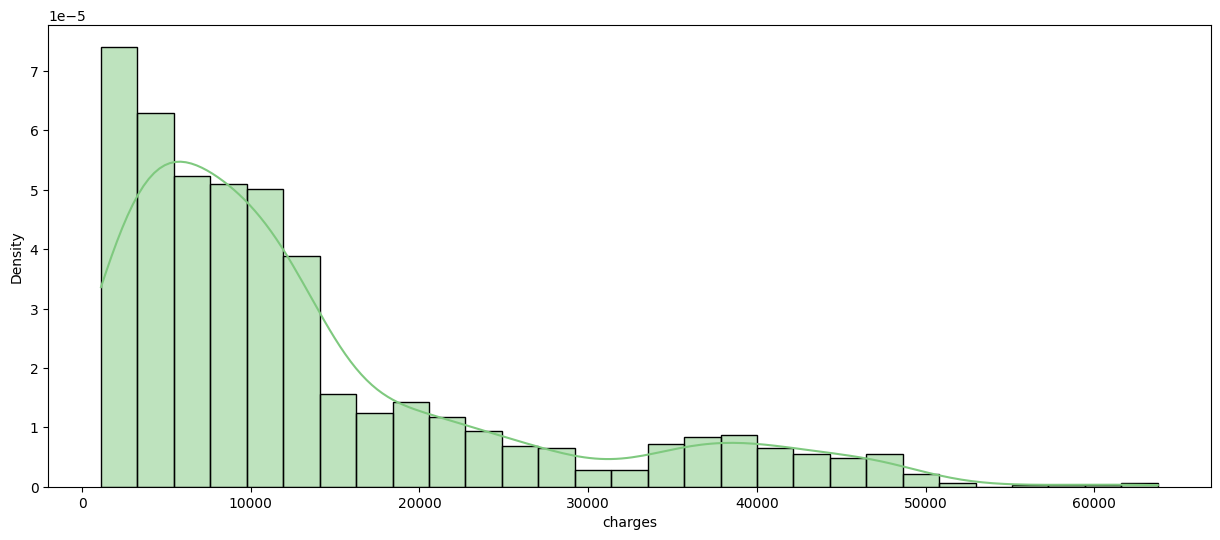

In [ ]:
plt.figure(figsize = (15,6))#15-width,6-height
sns.histplot(data['charges'],kde=True, stat="density")#stat="density"-This parameter ensures that the histogram represents a probability density rather than the frequency counts
#This is same as distplot()

The data is positive skewed. Most of the charges are between 1000–4000 Dollars.

##Age Vs Charges
The distribution of age is plotted using histogram.

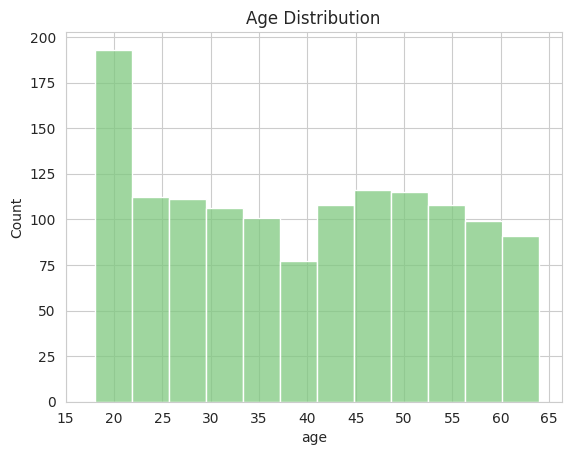

In [ ]:
sns.set_style('whitegrid')
sns.histplot(data.age)
plt.title('Age Distribution')
plt.xticks(np.arange(15, 70, step=5))#plt.xticks()This function from Matplotlib's pyplot module sets the locations of the x-axis ticks.
plt.show()

Most of the people are in 18-22 age groups while least number of people is from 37-41 age group.

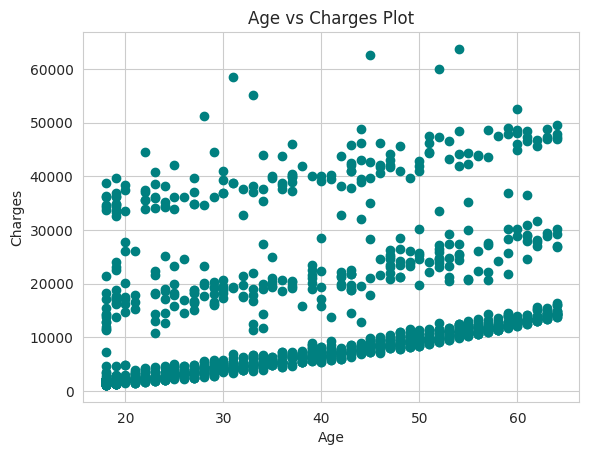

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge
#plt.scatter(data.age,data.charges)same as
plt.scatter(data['age'],data['charges'],color='teal')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title("Age vs Charges Plot")
plt.show()



<Axes: xlabel='age', ylabel='charges'>

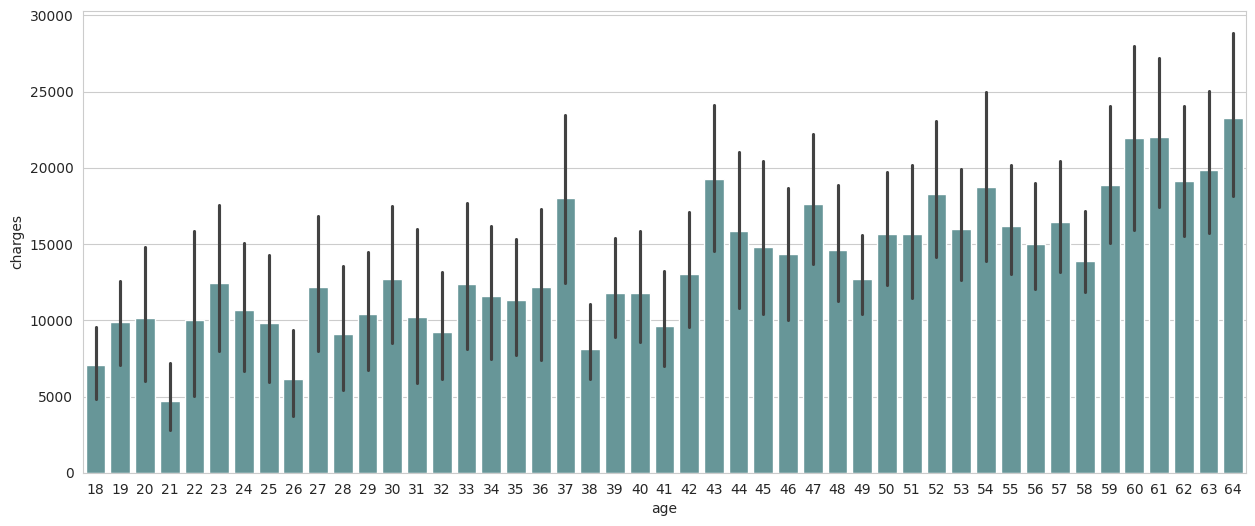

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data,x=data.age,y=data.charges,color='cadetblue')

As age increases charges also slightly increase.

##sex vs charges

In [ ]:
#Check the count for each category in the "sex" column
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

here number of males and females almost same

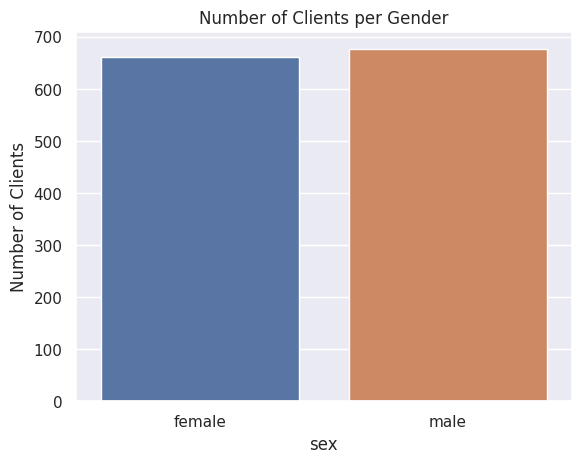

In [ ]:
#Creating a countplot to visualize the count of each category in the sex column.
# set grid style
sns.set(style ="darkgrid")
sns.countplot(data,x="sex",hue='sex')
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

In [ ]:
#combaring sex vs charges,male's insurance charge is more than female's.
#Check the mean charges per category in the sex column
data.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [ ]:
#We can find out the mean separately as well
#Both ways give us mean
print('Mean charges of female :',np.mean(data[data["sex"]=='female']["charges"]))
print('Mean charges of male : ',np.mean(data[data["sex"]=='male']["charges"]))

here We can find out that men are charged slightly more than women.

<Axes: xlabel='sex', ylabel='charges'>

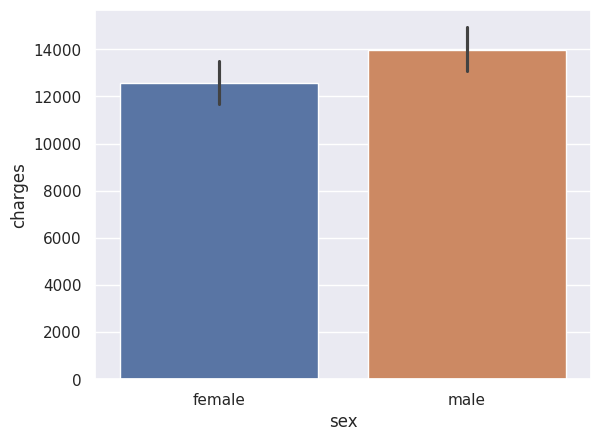

In [ ]:
male_charges=data[data['sex']=='male']['charges']female_charges=data[data['sex']=='female']['charges']


sns.barplot(data,x = 'sex', y = 'charges',hue='sex')

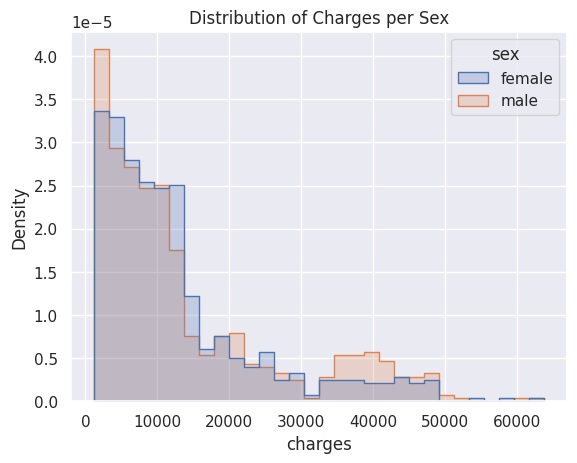

In [ ]:
#Creating histograms to compare distribution
sns.histplot(data,x="charges",hue="sex",element="step",stat="density")#elemt=step- This parameter determines the style of the histogram. Setting it to "step" creates a step plot, which is suitable for visualizing the distribution of continuous variables.
plt.title("Distribution of Charges per Sex")
plt.show()



##BMI vs charge

[Text(0.5, 1.0, 'Distribution of bmi'), Text(0, 0.5, 'Number of customers')]

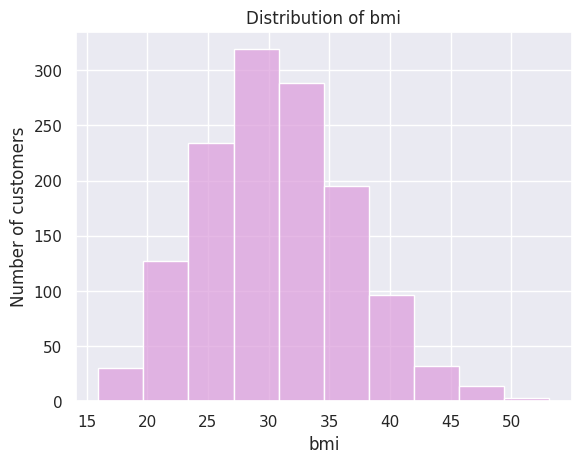

In [ ]:
sns.histplot(data,x="bmi",bins=10,color='plum').set(title="Distribution of bmi",ylabel="Number of customers")

Most people have BMI between 27 to 31.

<Axes: xlabel='bmi', ylabel='charges'>

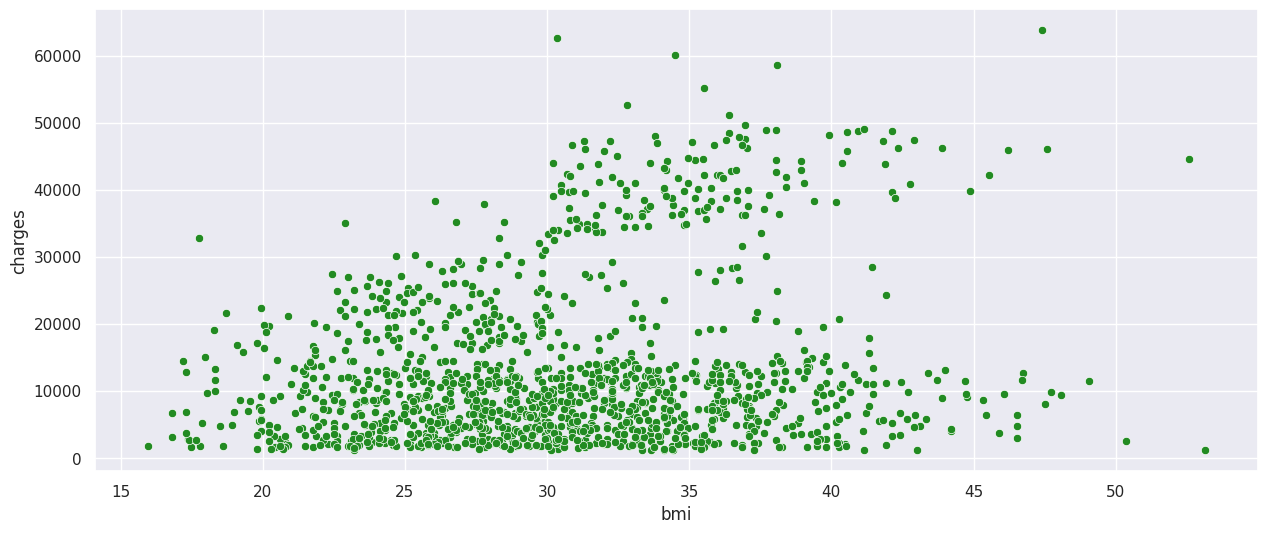

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data,x='bmi',y='charges',color='forestgreen')

After BMI=30, there are chances of high rates of insurance depending on other factors as well.

##children vs charges

<Axes: xlabel='children', ylabel='count'>

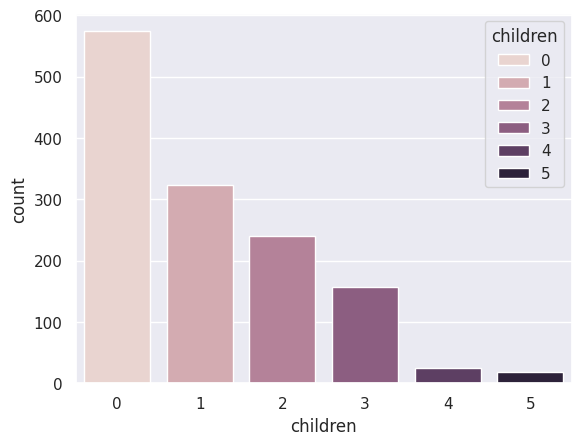

In [ ]:
sns.countplot(x='children',data=data,hue='children')

Majority of the clients do not have children. There are only a very few people with 4 or 5 kids.

<Axes: xlabel='children', ylabel='charges'>

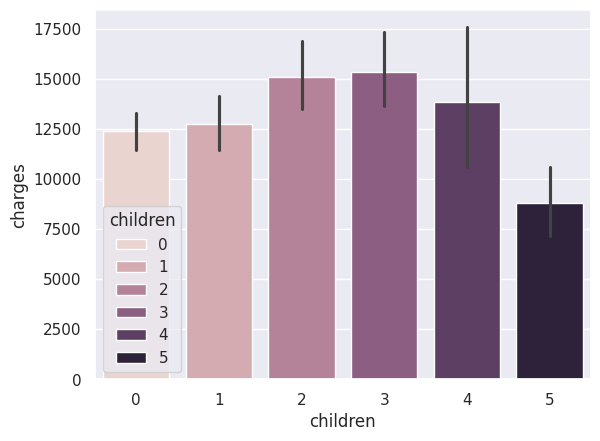

In [ ]:
sns.barplot(data,x = 'children', y = 'charges',hue='children')

Number of children doesn't have any impact on insurance charges.

##Smokers Vs Charges
Next is to find out smokers and non-smokers in the dataset.

In [ ]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

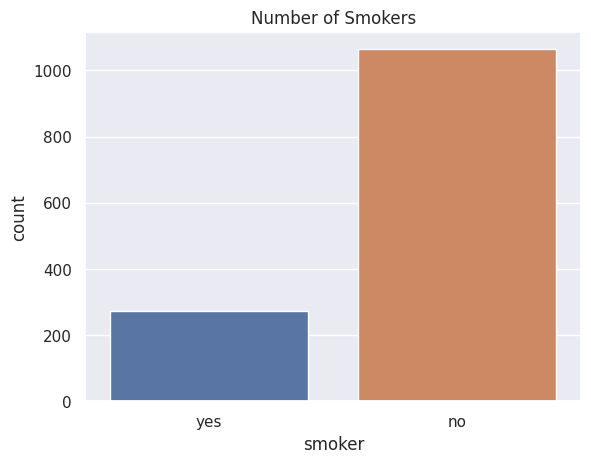

In [ ]:
#Another method is creating a countplot to visualize the count of smokers and non-smokers.
sns.countplot(data,x="smoker",hue='smoker')
plt.title("Number of Smokers")
plt.show()

We can interpret that the total number of people who smoke among the dataset is 4 times lesser than the people who don't smoke.

In [ ]:
data.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

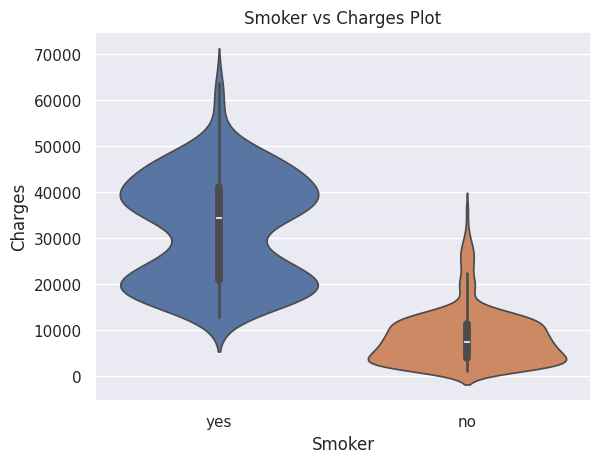

In [ ]:
#combare to smoker vs charges smokers have more insurance charges than the non smokers
sns.violinplot(data,x='smoker',y='charges',hue='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title("Smoker vs Charges Plot")
plt.show()

The charges are almost four times higher for smokers.

In [ ]:
male_smokers=data[data['sex']=='male'][data['smoker']=='yes']
female_smokers=data[data['sex']=='female'][data['smoker']=='yes']
print('There are {} male smokers and {} female smokers'.format(len(male_smokers),len(female_smokers)))

There are 159 male smokers and 115 female smokers


<ipython-input-21-42d52700d1b3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_smokers=data[data['sex']=='male'][data['smoker']=='yes']
<ipython-input-21-42d52700d1b3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_smokers=data[data['sex']=='female'][data['smoker']=='yes']


Text(0.5, 1.0, 'Charges for smokers')

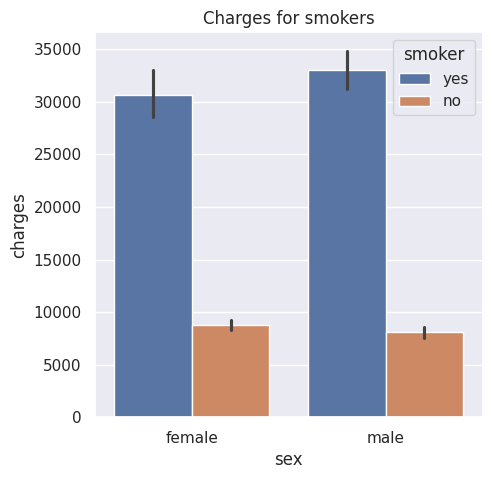

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=data)
plt.title('Charges for smokers')

##Region vs charges

In [ ]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

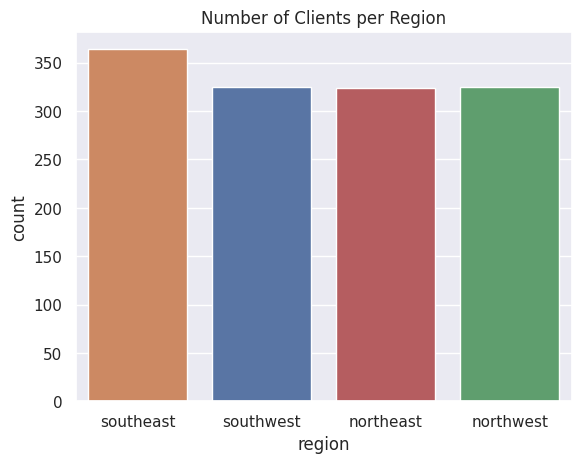

In [ ]:
sns.countplot(data,x="region",order=["southeast","southwest","northeast","northwest"],hue='region')
plt.title("Number of Clients per Region")
plt.show()

It is visible that the number of people from southwest, northeast and northwest are equal. The number of people from southeast is a bit more.

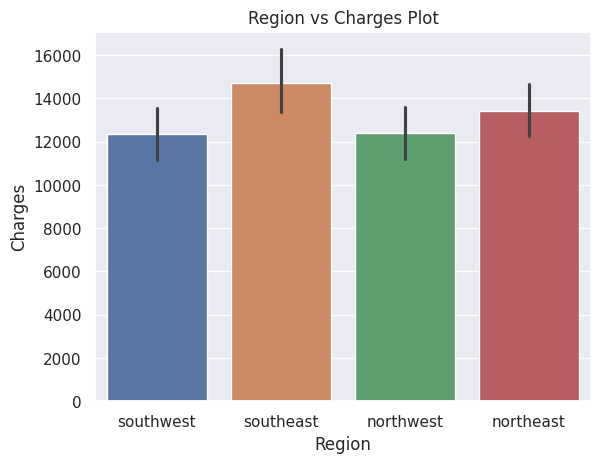

In [ ]:
#combare to region vs charges region actually does not play any role in determining the insurance charges
sns.barplot(data,x='region',y='charges',hue='region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title("Region vs Charges Plot")
plt.show()


The barplot of region vs charges doesn't give us any insight about the relationship of both. Hence, we conclude that region doesn't have any impact on charges.

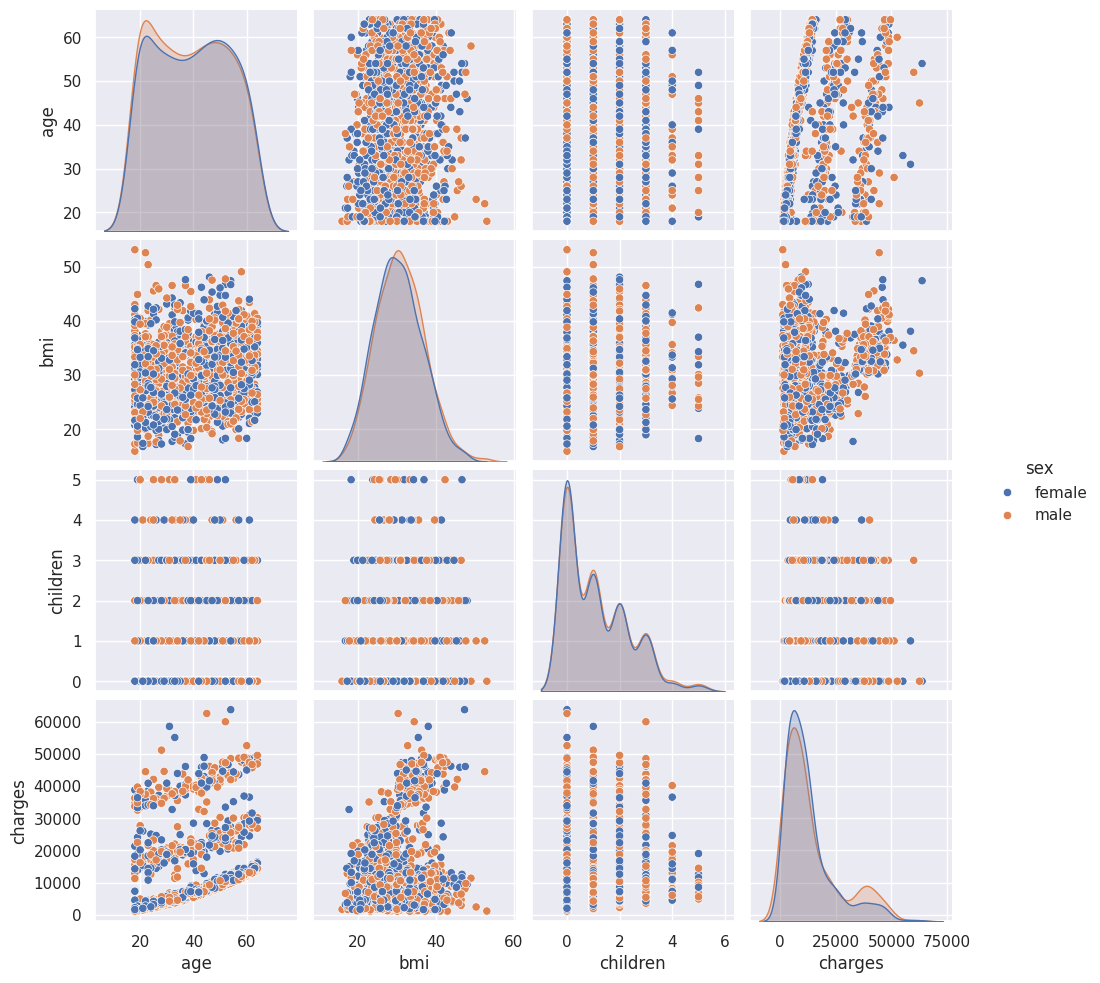

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data,hue='sex')

##Finding out correlation between each factors

plotting the correlation plot for the dataset

In [ ]:
df=data.copy()

Creating a copy of the DataFrame can be useful for various purposes, such as performing operations or modifications on the data without affecting the original DataFrame. This allows you to experiment and make changes to the data without worrying about losing or altering the original dataset.

In [ ]:
#Creating a new "gender" column with value 1 for male and 0 for female
df['gender'] = np.where(df['sex']=='male',1,0)
df['gender'].value_counts()

gender
1    676
0    662
Name: count, dtype: int64

In [ ]:
#Create a new "Smoker" column with value 1 for smoker and 0 for not.
df['Smoker'] = np.where(df['smoker']=='yes',1,0)
df['Smoker'].value_counts()


Smoker
0    1064
1     274
Name: count, dtype: int64

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,gender,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
#choosing only numerical variables for correlation matrix
df=df.drop(['sex','smoker','region'],axis=1)


In [ ]:
df

,age,bmi,children,charges,gender,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


<Axes: >

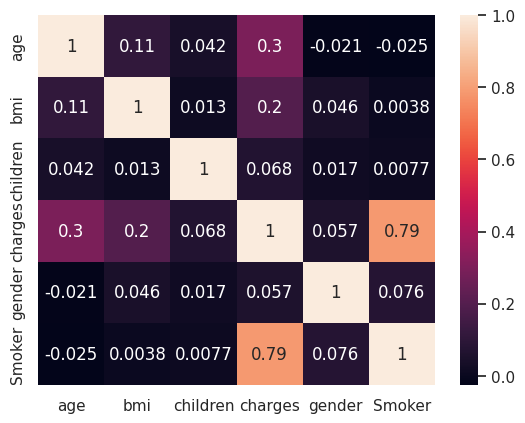

In [ ]:
# plotting the correlation plot for the dataset
sns.heatmap(df.corr(), annot=True)

Insights from the heatmap:

* High positive correlation if a smoker. That means high charges for a smoker.

* Positive correlation between age and charges. As the age increases, insurance charges also increase or vice versa.

* Weak correlation between BMI and charges.

* Almost no relationship between number of children and charges.

* Almost no relationship between gender and charges.

##STEP-3:Data Preprocessing / Clean the Data


We already have our dataset 'df' with values encoded and 'region' omitted since 'region' doesn't have any role in the predction of 'charges'. But let's proceed in the proper way.

In [ ]:
df1=data.copy()

# Label Encoding for sex and smoker
# Import label encoder
from sklearn import preprocessing#This imports the preprocessing module from scikit-learn, which contains various utilities for preprocessing data.

label_encoder = preprocessing.LabelEncoder()# This creates an instance of the LabelEncoder class, which is used to encode categorical features with numerical labels.

# Encode labels in column 'sex'.
df1['sex']= label_encoder.fit_transform(df1['sex'])#This line applies the label encoding transformation to the 'sex' column in the DataFrame df1. It first fits the label encoder to the unique values in the 'sex' column using fit_transform(), which assigns a unique numerical label to each unique category in the 'sex' column.

df1['sex'].unique()#This line prints out the unique values of the transformed 'sex' column after label encoding.

array([0, 1])

By encoding categorical variables like 'sex' into numerical labels, you can prepare the data for machine learning algorithms that require numerical input. However, it's important to note that label encoding may introduce ordinality where none exists, which might not be appropriate for all types of categorical variables.








In [ ]:
# Encode labels in column 'smoker'.
df1['smoker']= label_encoder.fit_transform(df1['smoker'])

df1['smoker'].unique()

array([1, 0])

In [ ]:

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


From our analysis, we understood that 'region' doesn't play any role in deciding the charges and 'charges' is our continuous target variable. So we are dropping both the columns from our input features.

In [ ]:
# removing unnecassary columns from the dataset
df1.drop(['region','charges'],axis=1,inplace=True)
df1

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
X=df1
y=data.charges

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.model_selection import train_test_split: This imports the train_test_split function from scikit-learn's model_selection module, which is used to split datasets into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): This line splits the input features (X) and the target variable (y) into training and testing sets.

Here's what each argument does:

X: The input features (independent variables) of the dataset.

y: The target variable (dependent variable) of the dataset.

test_size=0.2: This specifies the proportion of the dataset to include in the testing set. In this case, it's set to 0.2, which means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state=0: This parameter sets the random seed for reproducibility. Setting it to a specific value ensures that the data split will be the same every time the code is run, which is useful for obtaining consistent results.

After running this line of code, X_train and y_train will contain the training input features and target variable, respectively, while X_test and y_test will contain the testing input features and target variable, respectively. These datasets can then be used to train and evaluate machine learning models.








In [ ]:
print(X_train.head())

      age  sex     bmi  children  smoker
621    37    1  34.100         4       1
194    18    1  34.430         0       0
240    23    0  36.670         2       1
1168   32    1  35.200         2       0
1192   58    0  32.395         1       0


In [ ]:

print(X_test.head())

      age  sex     bmi  children  smoker
578    52    1  30.200         1       0
610    47    0  29.370         1       0
569    48    1  40.565         2       1
1034   61    1  38.380         0       0
198    51    0  18.050         0       0


In [ ]:

print(y_train.head())

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64


In [ ]:
print(y_test.head())

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


#STEP-4 : Fit the Model & Predict , check the Accuracy
To perform linear regression, LinearRegression class is imported from the module linear_model of the Scikit-learn library. The simple regression model built will be an instance of class LinearRegression.

Now we’ll fit the model on the training data:

##Linear Regression

The most extensively used modelling technique is linear regression, which assumes a linear connection between a dependent variable (y) and an independent variable (X).

In [ ]:
# creating the model and feeding the training data to the model
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#calculating mean squared error
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

#calculating root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mse))

# print model score
print("Model Score: ", regressor.score(X_test, y_test))

# print r_square_score
print("R_square score: ", r2_score(y_test,y_pred))

Mean Squared Error:  32165826.64360513
Root Mean Squared Error:  5671.492452926755
Model Score:  0.7978644236809904
R_square score:  0.7978644236809904


Our Linear Regression model accuracy is 75.2% which can be considered as good performance.

##Support Vector Machine

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM works by finding a hyperplane in a high-dimensional space that best separates data into different classes. It aims to maximize the margin (the distance between the hyperplane and the nearest data points of each class) while minimizing classification errors. SVM can handle both linear and non-linear classification problems by using various kernel functions. It’s widely used in tasks such as image classification, text categorization, and more.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

svregressor= SVR(kernel='linear',C=100)
svregressor.fit(X_train,y_train)

SVR(C=100, kernel='linear')

In [ ]:
# Predicting the Test set results
y_pred_train = svregressor.predict(X_train)
y_pred = svregressor.predict(X_test)

In [ ]:
#calculating mean squared error
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

#calculating root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mse))

# print model score
print("Model Score: ", svregressor.score(X_test, y_test))

# print r_square_score
print("R_square score: ", r2_score(y_test,y_pred))


Mean Squared Error:  56915638.82443317
Root Mean Squared Error:  7544.245411201386
Model Score:  0.6423323553032756
R_square score:  0.6423323553032756


The accuracy of the model is 58.3%

##Decision Tree

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtregressor= DecisionTreeRegressor()
dtregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Test set results
y_pred_train = dtregressor.predict(X_train)
y_pred = dtregressor.predict(X_test)

In [ ]:
#calculating mean squared error
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

#calculating root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mse))

# print model score
print("Model Score: ", dtregressor.score(X_test, y_test))

# print r_square_score
print("R_square score: ", r2_score(y_test,y_pred))

Mean Squared Error:  43305741.00753836
Root Mean Squared Error:  6580.709764724346
Model Score:  0.7278592895040416
R_square score:  0.7278592895040416


##Random Forest

Random forest is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression and classification in machine learning.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting the Test set results
y_pred_train = rfregressor.predict(X_train)
y_pred = rfregressor.predict(X_test)


In [ ]:
#calculating mean squared error
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

#calculating root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mse))

# print model score
print("Model Score: ", rfregressor.score(X_test, y_test))

# print r_square_score
print("R_square score: ", r2_score(y_test,y_pred))

Mean Squared Error:  20062875.699365273
Root Mean Squared Error:  4479.1601555833295
Model Score:  0.8739214450465831
R_square score:  0.8739214450465831


#Compare and evaluate the Model results and find the best model
Linear Regression - 75.2%

Support Vector Machine - 58.3%

Decision Tree - 75%

Random Forest - 83.7%

#Conclusion:

The best model for our dataset is Random Forest Regression Model. We get almost 84% accuracy.